In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw

In [2]:
# use material parameters such that equations simplify
mu, lam = 0.5, 0  # Lame parameter
nu = lam/(2*(lam+mu)) # Possion ratio (=0)
E = mu*(3*lam+2*mu)/(lam+mu) # Young's modulus (=1)

# uniform distributed load
q = -1.2

In [3]:
mesh = Make1DMesh(10)

In [4]:
u =  H1(mesh, order=1, dirichlet="left|right")
sigma = H1(mesh, order=1, dirichlet="left|right")
fesm = u*sigma
# print ("ndof =", fesm.ndof)
u, sigma = fesm.TrialFunction()
du , dsigma = fesm.TestFunction()

a = BilinearForm(fesm, symmetric=True)
a += (12*sigma*dsigma + grad(u)*grad(dsigma) + grad(du)*grad(sigma))*dx
    
f = LinearForm(fesm)
f += -q*du*dx

gfsol = GridFunction(fesm)
    
a.Assemble()
f.Assemble()
gfsol.vec.data = a.mat.Inverse(fesm.FreeDofs(),inverse="umfpack")*f.vec
gfw, gfsigma = gfsol.components
# Draw(gfw, mesh, deformation=CF((0,gfw,0)))
# Draw(gfsigma, mesh, deformation=CF((0,gfsigma,0)))

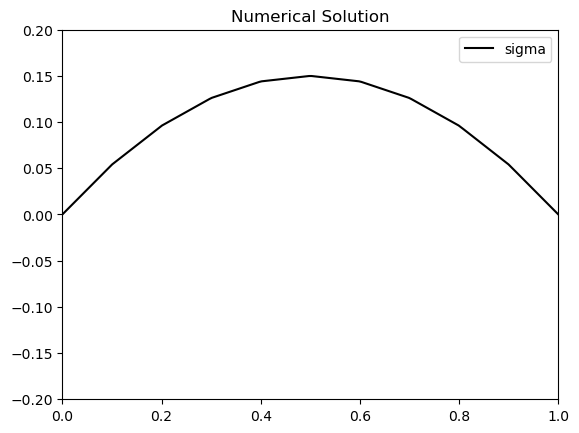

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,1,200)
gfsigma(mesh(x))

plt.plot(x,gfsigma(mesh(x)),color='black',label='sigma',linestyle="-")
plt.ylim([-0.2, 0.2])
plt.xlim([0, 1.0])
plt.title("Numerical Solution")
plt.legend()

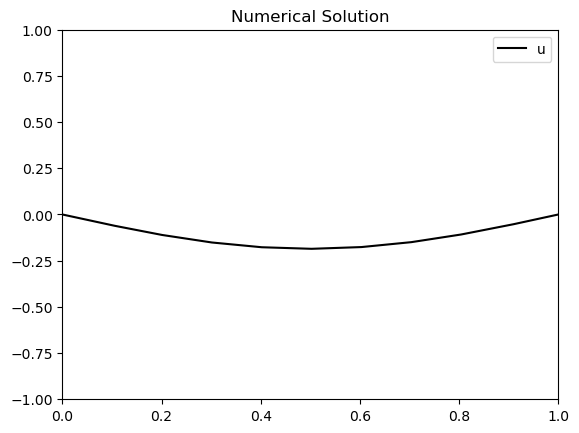

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,1,200)
gfw(mesh(x))

plt.plot(x,gfw(mesh(x)),color='black',label='u',linestyle="-")
plt.ylim([-1.0, 1.0])
plt.xlim([0, 1.0])
plt.title("Numerical Solution")
plt.legend()